In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import string
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer


pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000
pd.set_option('display.max_colwidth', -1)

<ipython-input-1-b88af158e1bd>:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
df = pd.read_csv('../data/subreddit_scrape.csv')

In [3]:
df.head(3)

,title,score,comms_num,created,body,subreddit
0,CMV: Mike Bloomberg's campaign is proof that the ultra wealthy in the US can afford a higher tax rate with no ill effect on them,65396,3812,2020-03-06 02:22:18,"Mike Bloomberg recently dropped out of the 2020 Presidential race after spending over $500 million dollars of his own money on his campaign. Even with this loss, he is still worth over $55 billion dollars.\n\n\nI believe that this effortless spending on Bloombergs part showcases the reality that is wealth inequality between the ultra rich and working class. While I do not believe the rich should give up their fortunes, I do believe that any arguments against taxing them more is simply propaganda from those who hold the wealth and higher power at this point. \n\nCertain media outlets claim that taxing the super wealthy is unfair and would be detrimental to those below them due to ""trickle down"" effects. There is also rhetoric that many self made billionaires worked hard for their fortunes, and that if we as Americans work hard, we might be rich ourselves one day.\n\nI believe that moving forward, we should push for much higher taxes on those earning/worth more than 1 billion USD. If the money Bloomberg spent on his campaign went to actual communities that need funding, actual change could have been possible. Social programs could benefit greatly from these funds, and maybe we could afford to better fund national programs such as healthcare or family leave.",1
1,CMV: Kanye West is a shill for president Trump and running to syphon off young voters from voting for Biden.,54138,2101,2020-07-06 00:25:43,"Kanye West is a shill for president Trump and running to syphon off young voters from voting for Biden. First, he may have an excentric take on reality but can't honestly believe that he has a chance of winning. Second, if he truly wanted to be president, he would have started his campaign last year when he still had a chance to get on state ballots. Third, he has been an avid defender of Trump and the MAGA agenda. Just from reviewing other threads on reddit, there are people willing to vote for him. Generally speaking, the fan base of artists like Kanye skews young and culturally diverse, which are both not likely to vote for Trump. \n\nThere are plenty of other reasons you can say that Kanye is running, but unless you say how my view is flawed I will only consider those reasons as supplemental to the above concept and not as a replacement for.\n\nEDIT: Interesting.... https://www.thedailybeast.com/billionaire-kanye-wests-company-yeezy-llc-gets-multimillion-dollar-ppp-loan-from-trump-admin?utm_source=feedly&utm_medium=webfeeds",1
2,CMV: Donald Trump has not made a single lasting positive impact on the USA during his term as president.,35185,5332,2020-09-10 22:11:37,"I write this because I am tired of the wild goose chase that is finding examples of his success. Anything surrounding Donald Trump is shrouded in divisive language and biased opinions. Liberals will have you believe he has done nothing, while conservatives will tout his unlimited success. I must be missing it, because any time I try to research into a topic I get lost in opinion and bias. \n\nI am completely willing to hear and review and accept any examples of success or lasting positive change that has come about as a direct result of Trumps presidency. In fact I want to! It can’t be ALL bad.\n\nEdit1: a lot of responses here. I need to actually read the sources for the claims everyone’s making, so it may take a while for me to respond to each comment, but I will try. I’ll take this chance to remind everyone it’s possible to have civil discourse about even the most divisive topics, even the infamous DJT. Thanks all for the responses.\n\nEdit2: double thanks to those who are responding and engaging one another civilly, and awarding the post. I think it’s important to realize how biased we can become despite the facts. The good things don’t necessarily outweigh t

In [4]:
df['created'].sort_values(ascending = True)

816     2013-05-04 04:52:27
362     2013-06-07 22:55:40
906     2013-09-11 22:01:17
492     2013-12-31 09:57:55
864     2014-01-14 22:33:14
832     2014-02-09 22:40:17
886     2014-03-11 01:34:15
892     2014-04-07 21:23:30
815     2014-05-30 16:22:48
839     2014-06-22 21:34:58
878     2014-07-10 03:43:18
387     2014-09-04 01:57:28
926     2014-09-09 03:50:46
918     2014-12-15 01:47:02
813     2014-12-17 06:59:03
311     2015-01-26 18:50:55
908     2015-04-03 20:57:38
711     2015-05-28 04:46:45
868     2015-06-29 04:56:12
924     2015-09-23 01:28:02
881     2015-10-14 13:19:13
616     2015-11-18 10:59:02
477     2015-12-12 20:45:45
774     2016-01-16 02:55:36
913     2016-03-03 22:19:41
887     2016-04-19 16:44:56
840     2016-05-08 10:11:12
76      2016-05-20 20:55:38
482     2016-06-21 03:30:32
615     2016-06-24 16:50:55
605     2016-06-29 11:37:58
303     2016-07-06 00:49:37
422     2016-07-25 20:49:02
622     2016-07-30 00:42:19
588     2016-08-04 18:30:54
253     2016-08-15 1

## Create New Numerical Features

In [5]:
# Recast as string( fixed errors in code below)
df['body'] = df['body'].astype(str)

In [6]:
# Add column for number of '!'
def exclamation(text):
    marks = []
    for mark in text:
        if mark == '!':
            marks.append(mark)
    
    return len(marks)

df['body_exclamation_marks'] = df['body'].apply(exclamation)
df['title_exclamation_marks'] = df['title'].apply(exclamation)


In [7]:
# Add column for number of words in body and title
def count_words(text):
    words = text.split(' ')
    num_words = len(words)
    return num_words

df['body_word_count'] = df['body'].map(count_words)
df['title_word_count'] = df['title'].map(count_words)

In [8]:
# Add column for number of characters in body
df['body_character_length'] = df['body'].apply(len)
df['title_character_length'] = df['title'].apply(len)

In [9]:
# Column for number of upper case letters

def upper_case(text):
    uppers = []
    for char in text:
        if char.isalpha() and char.upper() == char:
            uppers.append(char)
    
    return len(uppers)

df['body_upper_case'] = df['body'].apply(upper_case)
df['title_upper_case'] = df['title'].apply(upper_case)

In [10]:
def lower_case(text):
    lowers = []
    for char in text:
        if char.isalpha() and char.lower() == char:
            lowers.append(char)
    
    return len(lowers)

df['body_lower_case'] = df['body'].apply(lower_case)
df['title_lower_case'] = df['title'].apply(lower_case)

In [11]:
df.head(3)

,title,score,comms_num,created,body,subreddit,body_exclamation_marks,title_exclamation_marks,body_word_count,title_word_count,body_character_length,title_character_length,body_upper_case,title_upper_case,body_lower_case,title_lower_case
0,CMV: Mike Bloomberg's campaign is proof that the ultra wealthy in the US can afford a higher tax rate with no ill effect on them,65396,3812,2020-03-06 02:22:18,"Mike Bloomberg recently dropped out of the 2020 Presidential race after spending over $500 million dollars of his own money on his campaign. Even with this loss, he is still worth over $55 billion dollars.\n\n\nI believe that this effortless spending on Bloombergs part showcases the reality that is wealth inequality between the ultra rich and working class. While I do not believe the rich should give up their fortunes, I do believe that any arguments against taxing them more is simply propaganda from those who hold the wealth and higher power at this point. \n\nCertain media outlets claim that taxing the super wealthy is unfair and would be detrimental to those below them due to ""trickle down"" effects. There is also rhetoric that many self made billionaires worked hard for their fortunes, and that if we as Americans work hard, we might be rich ourselves one day.\n\nI believe that moving forward, we should push for much higher taxes on those earning/worth more than 1 billion USD. If the money Bloomberg spent on his campaign went to actual communities that need funding, actual change could have been possible. Social programs could benefit greatly from these funds, and maybe we could afford to better fund national programs such as healthcare or family leave.",1,0,0,211,25,1268,128,19,7,1001,95
1,CMV: Kanye West is a shill for president Trump and running to syphon off young voters from voting for Biden.,54138,2101,2020-07-06 00:25:43,"Kanye West is a shill for president Trump and running to syphon off young voters from voting for Biden. First, he may have an excentric take on reality but can't honestly believe that he has a chance of winning. Second, if he truly wanted to be president, he would have started his campaign last year when he still had a chance to get on state ballots. Third, he has been an avid defender of Trump and the MAGA agenda. Just from reviewing other threads on reddit, there are people willing to vote for him. Generally speaking, the fan base of artists like Kanye skews young and culturally diverse, which are both not likely to vote for Trump. \n\nThere are plenty of other reasons you can say that Kanye is running, but unless you say how my view is flawed I will only consider those reasons as supplemental to the above concept and not as a replacement for.\n\nEDIT: Interesting.... https://www.thedailybeast.com/billionaire-kanye-wests-company-yeezy-llc-gets-multimillion-dollar-ppp-loan-from-trump-admin?utm_source=feedly&utm_medium=webfeeds",1,0,0,159,20,1039,108,24,7,807,80
2,CMV: Donald Trump has not made a single lasting positive impact on the USA during his term as president.,35185,5332,2020-09-10 22:11:37,"I write this because I am tired of the wild goose chase that is finding examples of his success. Anything surrounding Donald Trump is shrouded in divisive language and biased opinions. Liberals will have you believe he has done nothing, while conservatives will tout his unlimited success. I must be missing it, because any time I try to research into a topic I get lost in opinion and bias. \n\nI am completely willing to hear and review and accept any examples of success or lasting positive change that has come about as a direct result of Trumps presidency. In fact I want to! It can’t be ALL bad.\n\nEdit1: a lot of responses here. I need to actually read the sources for the claims everyone’s making, so it may take a while for me to respond to each comment, but I will try. I’ll take this chance to remind everyone it’s possible to have civil discourse about even the most divisive topics, even the infamous DJT. Thank

## Remove Punctuation & Hyperlinks

In [12]:
# Remove hyperlinks
df['title'] = df['title'].replace('http\S+', '', regex=True).replace('www\S+', '', regex=True).replace('#\S+', '', regex=True).replace('\n\n\S+', '', regex=True)
df['body'] = df['body'].replace('http\S+', '', regex=True).replace('www\S+', '', regex=True).replace('#\S+', '', regex=True).replace('\n\n\S+', '', regex=True)

In [13]:
# Remove quotes, commas, apostrophes
df['title'] = df['title'].str.replace(r"[\"\',]", '',regex = True)
df['body'] = df['body'].str.replace(r"[\"\',]", '',regex = True)

In [14]:
# This function is going to remove punctuation and make the text lower case

def remove_punctuation(text):
    lower = text.lower()  
    exclude = string.punctuation  
    return "".join(ch for ch in lower if ch not in exclude) 
   

In [15]:
df['title'] = df['title'].apply(remove_punctuation)
df['body'] = df['body'].apply(remove_punctuation)

In [16]:
df.head(3)

,title,score,comms_num,created,body,subreddit,body_exclamation_marks,title_exclamation_marks,body_word_count,title_word_count,body_character_length,title_character_length,body_upper_case,title_upper_case,body_lower_case,title_lower_case
0,cmv mike bloombergs campaign is proof that the ultra wealthy in the us can afford a higher tax rate with no ill effect on them,65396,3812,2020-03-06 02:22:18,mike bloomberg recently dropped out of the 2020 presidential race after spending over 500 million dollars of his own money on his campaign even with this loss he is still worth over 55 billion dollars\n believe that this effortless spending on bloombergs part showcases the reality that is wealth inequality between the ultra rich and working class while i do not believe the rich should give up their fortunes i do believe that any arguments against taxing them more is simply propaganda from those who hold the wealth and higher power at this point media outlets claim that taxing the super wealthy is unfair and would be detrimental to those below them due to trickle down effects there is also rhetoric that many self made billionaires worked hard for their fortunes and that if we as americans work hard we might be rich ourselves one day believe that moving forward we should push for much higher taxes on those earningworth more than 1 billion usd if the money bloomberg spent on his campaign went to actual communities that need funding actual change could have been possible social programs could benefit greatly from these funds and maybe we could afford to better fund national programs such as healthcare or family leave,1,0,0,211,25,1268,128,19,7,1001,95
1,cmv kanye west is a shill for president trump and running to syphon off young voters from voting for biden,54138,2101,2020-07-06 00:25:43,kanye west is a shill for president trump and running to syphon off young voters from voting for biden first he may have an excentric take on reality but cant honestly believe that he has a chance of winning second if he truly wanted to be president he would have started his campaign last year when he still had a chance to get on state ballots third he has been an avid defender of trump and the maga agenda just from reviewing other threads on reddit there are people willing to vote for him generally speaking the fan base of artists like kanye skews young and culturally diverse which are both not likely to vote for trump are plenty of other reasons you can say that kanye is running but unless you say how my view is flawed i will only consider those reasons as supplemental to the above concept and not as a replacement for interesting,1,0,0,159,20,1039,108,24,7,807,80
2,cmv donald trump has not made a single lasting positive impact on the usa during his term as president,35185,5332,2020-09-10 22:11:37,i write this because i am tired of the wild goose chase that is finding examples of his success anything surrounding donald trump is shrouded in divisive language and biased opinions liberals will have you believe he has done nothing while conservatives will tout his unlimited success i must be missing it because any time i try to research into a topic i get lost in opinion and bias am completely willing to hear and review and accept any examples of success or lasting positive change that has come about as a direct result of trumps presidency in fact i want to it can’t be all bad a lot of responses here i need to actually read the sources for the claims everyone’s making so it may take a while for me to respond to each comment but i will try i’ll take this chance to remind everyone it’s possible to have civil discourse about even the most divisive topics even the infamous djt thanks all for the responses double thanks to those who are responding and engaging one another civilly and awarding the post i think it’s important to realize how biased we can become despite the facts the good things don’t necessarily outweigh the bad so maybe there’s a counterpost to be m

## CountVectorize Text

In [17]:
# Filter dataframe by subreddit to look at top words in each subreddit
UO = df[df['subreddit'] == 0]
CMV = df[df['subreddit'] == 1] 

In [18]:
# I want to remove the 'cmv' tag from the titles/body of the changemyview subreddit so that my model actually distinguishes between the content of the two subreddits. 
# source: https://stackoverflow.com/questions/24386489/adding-words-to-scikit-learns-countvectorizers-stop-list

custom = ['cmv', 'changemyview', 'change', 'view', 'unpopular', 'opinion']
english_plus = text.ENGLISH_STOP_WORDS.union(custom)

#### I started by using countvectorize to remove only custom words which may unfairly label each respective subreddit and looked at the most common words.

In [19]:
# UO 'title' w/ custom stopwords
cv = CountVectorizer(stop_words = custom)
cv.fit(UO['title'])
UO_title_cv1 = cv.transform(UO['title'])
UO_title_df1 = pd.DataFrame(UO_title_cv1.todense(), columns=cv.get_feature_names())

In [20]:
# CMV 'title' w/ custom stopwords
cv = CountVectorizer(stop_words = custom)
cv.fit(CMV['title'])
CMV_title_cv1 = cv.transform(CMV['title'])
CMV_title_df1 = pd.DataFrame(CMV_title_cv1.todense(), columns=cv.get_feature_names())

In [21]:
# UO 'body' w/ custom stopwords
cv = CountVectorizer(stop_words = custom)
cv.fit(UO['body'])
UO_body_cv1 = cv.transform(UO['body'])
UO_body_df1 = pd.DataFrame(UO_body_cv1.todense(), columns=cv.get_feature_names())

In [22]:
# CMV 'body' w/ custom stopwords
cv = CountVectorizer(stop_words = custom)
cv.fit(CMV['body'])
CMV_body_cv1 = cv.transform(CMV['body'])
CMV_body_df1 = pd.DataFrame(CMV_body_cv1.todense(), columns=cv.get_feature_names())

In [23]:
UO_title_top_50 = UO_title_df1.sum().sort_values(ascending = False).head(50)
CMV_title_top_50 = CMV_title_df1.sum().sort_values(ascending = False).head(50)

In [24]:
UO_body_top_50 = UO_body_df1.sum().sort_values(ascending = False).head(50)
CMV = CMV.dropna()
CMV_body_top_50 = CMV_body_df1.sum().sort_values(ascending = False).head(50)

In [25]:
UO_title_top_30 = UO_title_df1.sum().sort_values(ascending = False).head(30)
CMV_title_top_30 = CMV_title_df1.sum().sort_values(ascending = False).head(30)

In [26]:
UO_title_top_50

the        482
to         420
is         392
and        290
of         261
you        244
are        207
be         198
should     167
in         167
not        161
it         137
people     130
for        128
if         125
your       121
that       119
have       105
as         105
with       103
on         94 
they       87 
than       86 
just       85 
or         85 
their      79 
who        76 
because    67 
like       62 
about      59 
being      55 
no         55 
an         54 
its        52 
dont       51 
them       50 
when       48 
better     47 
more       46 
women      45 
at         45 
we         44 
but        42 
men        42 
one        41 
can        40 
kids       40 
get        39 
most       39 
all        37 
dtype: int64

In [27]:
CMV_title_top_50

the        690
to         527
and        411
is         411
of         343
should     341
be         328
in         248
not        200
for        175
are        144
that       132
it         124
as         122
people     116
or         104
on         98 
they       94 
have       89 
if         86 
their      78 
an         76 
with       74 
you        74 
than       67 
no         59 
all        58 
us         58 
who        54 
more       51 
being      50 
there      45 
about      45 
we         44 
its        44 
at         42 
from       41 
them       41 
because    40 
has        40 
by         39 
like       38 
other      36 
just       36 
your       33 
would      33 
public     32 
most       31 
will       31 
way        30 
dtype: int64

In [28]:
UO_body_top_30 = UO_body_df1.sum().sort_values(ascending = False).head(30)
CMV_body_top_30 = CMV_body_df1.sum().sort_values(ascending = False).head(30)

In [29]:
CMV_body_top_50

the        13108
to         11111
of         7844 
and        7678 
that       6049 
is         5650 
in         4699 
it         4076 
for        3205 
this       3060 
be         2917 
not        2635 
are        2619 
you        2559 
as         2408 
have       2322 
they       2189 
or         2153 
but        2105 
people     2073 
with       2034 
on         1977 
my         1870 
if         1793 
their      1491 
more       1374 
would      1298 
from       1241 
like       1232 
so         1201 
about      1181 
an         1165 
we         1119 
should     1118 
can        1097 
all        1087 
who        1083 
by         1081 
was        1074 
just       1068 
at         1045 
has        1039 
its        985  
because    980  
think      975  
do         974  
dont       953  
there      941  
me         939  
what       883  
dtype: int64

In [30]:
UO_body_top_50

the        5252
to         4805
and        4219
of         2943
it         2431
that       2361
you        2329
is         2278
in         1875
for        1576
are        1369
people     1301
not        1293
they       1273
this       1266
be         1188
have       1169
but        1112
with       1096
on         1029
or         1002
just       999 
if         930 
my         895 
like       842 
as         836 
about      807 
their      758 
so         736 
your       726 
all        695 
them       631 
me         620 
its        614 
who        596 
was        594 
do         591 
because    568 
at         568 
get        568 
can        551 
what       537 
when       522 
an         509 
we         497 
up         490 
dont       487 
how        468 
more       451 
there      448 
dtype: int64

#### Next I used Scikit-Learn's list of english stopwords plus my custom stop words.

In [31]:
# UO 'title' w/ English stopwords + custom stopwords
cv = CountVectorizer(stop_words = english_plus)
cv.fit(UO['title'])
UO_title_cv2 = cv.transform(UO['title'])
UO_title_df2 = pd.DataFrame(UO_title_cv2.todense(), columns=cv.get_feature_names())

In [32]:
# CMV 'title' w/ English stopwords + custom stopwords
cv = CountVectorizer(stop_words = english_plus)
cv.fit(CMV['title'])
CMV_title_cv2 = cv.transform(CMV['title'])
CMV_title_df2 = pd.DataFrame(CMV_title_cv2.todense(), columns=cv.get_feature_names())

In [33]:
# UO 'body' w/ English stopwords + custom stopwords
cv = CountVectorizer(stop_words = english_plus)
cv.fit(UO['body'])
UO_body_cv2 = cv.transform(UO['body'])
UO_body_df2 = pd.DataFrame(UO_body_cv2.todense(), columns=cv.get_feature_names())

In [34]:
# CMV 'body' w/ English stopwords + custom stopwords
cv = CountVectorizer(stop_words = english_plus)
cv.fit(CMV['body'])
CMV_body_cv2 = cv.transform(CMV['body'])
CMV_body_df2 = pd.DataFrame(CMV_body_cv2.todense(), columns=cv.get_feature_names())

In [35]:
UO_title_top_50 = UO_title_df2.sum().sort_values(ascending = False).head(50)
CMV_title_top_50 = CMV_title_df2.sum().sort_values(ascending = False).head(50)

In [36]:
UO_body_top_50 = UO_body_df2.sum().sort_values(ascending = False).head(50)


In [37]:
# Wasn't able to countvectorize body of CMV, due to ValueError related to np.nan value
CMV.isnull().sum()
CMV = CMV.dropna()

In [38]:
CMV_body_top_50 = CMV_body_df2.sum().sort_values(ascending = False).head(50)

In [39]:
UO_title_top_30 = UO_title_df2.sum().sort_values(ascending = False).head(30)
CMV_title_top_30 = CMV_title_df2.sum().sort_values(ascending = False).head(30)

In [40]:
UO_body_top_30 = UO_body_df2.sum().sort_values(ascending = False).head(30)
CMV_body_top_30 = CMV_body_df2.sum().sort_values(ascending = False).head(30)

In [41]:
UO_title_top_50

people        130
just          85 
like          62 
dont          51 
better        47 
women         45 
men           42 
kids          40 
don           33 
want          32 
stop          30 
need          30 
fucking       28 
make          27 
person        27 
reddit        27 
way           26 
youre         26 
time          25 
good          24 
doesnt        22 
life          22 
bad           21 
shouldnt      21 
world         21 
child         21 
thing         19 
shouldn       19 
hate          19 
media         19 
mean          19 
social        19 
having        18 
isnt          18 
internet      17 
care          17 
say           17 
school        17 
society       16 
mental        16 
shit          16 
old           16 
love          16 
america       16 
really        16 
annoying      16 
doesn         16 
reason        15 
attractive    15 
getting       15 
dtype: int64

In [42]:
CMV_title_top_50

people        116
like          38 
just          36 
public        32 
way           30 
child         27 
believe       27 
good          27 
better        26 
right         26 
political     25 
trump         24 
women         24 
america       24 
government    23 
make          23 
social        22 
bad           21 
dont          20 
think         19 
media         19 
wrong         19 
need          19 
men           18 
states        18 
gender        18 
reason        18 
illegal       17 
shouldnt      17 
vote          17 
education     17 
allowed       16 
stop          16 
white         16 
reddit        16 
children      15 
religion      15 
society       15 
instead       15 
years         15 
american      15 
world         15 
black         15 
required      14 
does          14 
sex           14 
problem       14 
united        14 
actually      14 
needs         14 
dtype: int64

In [43]:
UO_body_top_50

people        1301
just          999 
like          842 
dont          487 
think         407 
im            370 
know          368 
want          359 
time          330 
don           304 
really        299 
make          299 
way           271 
good          268 
feel          260 
say           253 
life          219 
lot           216 
saying        211 
post          211 
things        210 
men           207 
person        206 
women         203 
going         185 
need          185 
shit          182 
work          180 
kids          166 
point         166 
thing         163 
bad           161 
right         160 
day           156 
comments      153 
thats         153 
youre         153 
better        151 
getting       148 
fucking       147 
world         144 
look          144 
actually      141 
doing         141 
years         138 
makes         137 
having        135 
understand    135 
love          134 
school        131 
dtype: int64

In [44]:
CMV_body_top_50

people        2073
like          1232
just          1068
think         975 
dont          953 
im            756 
want          561 
way           557 
time          545 
make          538 
believe       520 
feel          508 
things        499 
know          469 
say           431 
good          428 
person        401 
really        398 
point         378 
lot           362 
right         336 
need          326 
work          321 
going         302 
better        302 
women         296 
life          291 
understand    287 
free          283 
actually      281 
ive           277 
does          274 
post          274 
years         271 
read          257 
men           256 
views         253 
use           251 
thing         248 
reason        247 
wrong         242 
example       237 
world         235 
argument      235 
having        232 
issue         231 
money         227 
bad           227 
fact          223 
saying        221 
dtype: int64

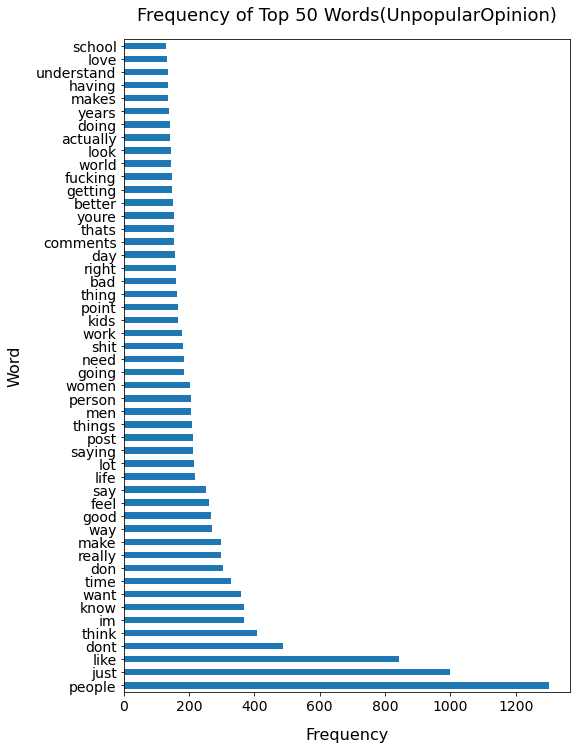

In [45]:
UO_body_top_50.plot(kind='barh', figsize=(8, 12), fontsize = 14)
plt.xlabel("Frequency", labelpad=14, fontsize = 16)
plt.ylabel("Word", labelpad=14, fontsize = 16)
plt.title("Frequency of Top 50 Words(UnpopularOpinion)", y=1.02, fontsize = 18);

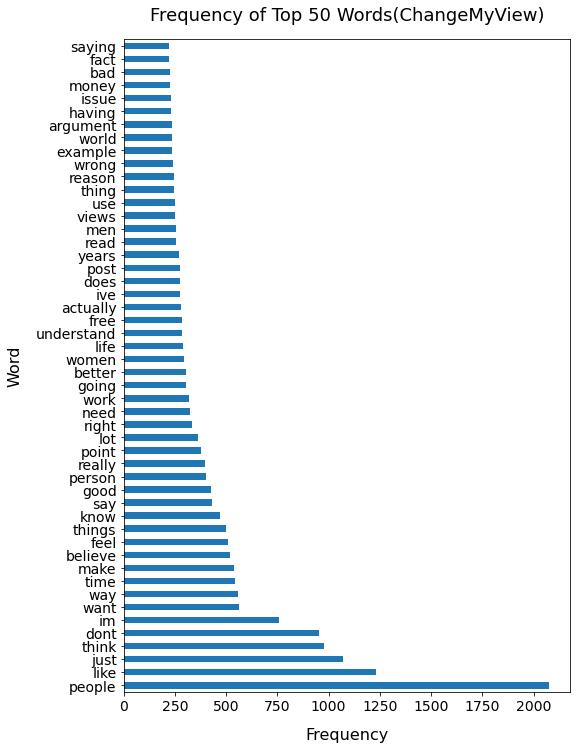

In [46]:
CMV_body_top_50.plot(kind='barh', figsize=(8, 12), fontsize = 14)
plt.xlabel("Frequency", labelpad=14, fontsize = 16)
plt.ylabel("Word", labelpad=14, fontsize = 16)
plt.title("Frequency of Top 50 Words(ChangeMyView)", y=1.02, fontsize = 18);

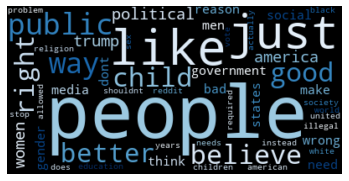

In [47]:
# wordcloud source: https://www.pythonprogramming.in/how-to-create-a-word-cloud-from-a-corpus.html
wcloud = WordCloud(background_color="black", colormap = 'Blues').generate_from_frequencies(CMV_title_top_50)
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

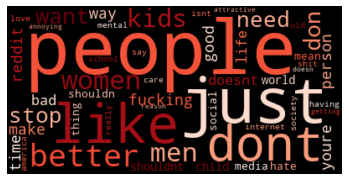

In [48]:
wcloud = WordCloud(background_color="black", colormap = 'Reds').generate_from_frequencies(UO_title_top_50)
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

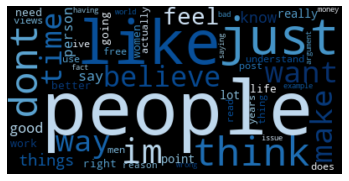

In [49]:
# wordcloud source: https://www.pythonprogramming.in/how-to-create-a-word-cloud-from-a-corpus.html
wcloud = WordCloud(background_color="black", colormap = 'Blues').generate_from_frequencies(CMV_body_top_50)
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

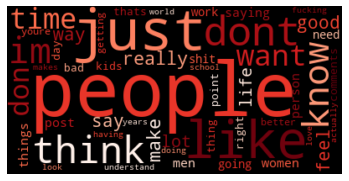

In [50]:
# wordcloud source: https://www.pythonprogramming.in/how-to-create-a-word-cloud-from-a-corpus.html
wcloud = WordCloud(background_color="black", colormap = 'Reds').generate_from_frequencies(UO_body_top_50)
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

#### I decided to also try out NLTK's list of stopwords since they are less extensive than Countvectorizer's

In [51]:
sw = stopwords.words('english')
sw.append('cmv')
sw.append('changemyview')


In [52]:
# UO 'title' w/ NLTK's stopwords
cv = CountVectorizer(stop_words = sw)
cv.fit(UO['title'])
UO_title_cv3 = cv.transform(UO['title'])
UO_title_df3 = pd.DataFrame(UO_title_cv3.todense(), columns=cv.get_feature_names())


In [53]:
# CMV 'title' w/ NLTK's stopwords
cv = CountVectorizer(stop_words = sw)
cv.fit(CMV['title'])
CMV_title_cv3 = cv.transform(CMV['title'])
CMV_title_df3 = pd.DataFrame(CMV_title_cv3.todense(), columns=cv.get_feature_names())


In [54]:
# UO 'body' w/ NLTK's stopwords
cv = CountVectorizer(stop_words = sw)
cv.fit(UO['body'])
UO_body_cv3 = cv.transform(UO['body'])
UO_body_df3 = pd.DataFrame(UO_body_cv3.todense(), columns=cv.get_feature_names())


In [55]:
# CMV 'body' w/ NLTK's stopwords
cv = CountVectorizer(stop_words = sw)
cv.fit(CMV['body'])
CMV_body_cv3 = cv.transform(CMV['body'])
CMV_body_df3 = pd.DataFrame(CMV_body_cv3.todense(), columns=cv.get_feature_names())

In [56]:
UO_title_top_50 = UO_title_df3.sum().sort_values(ascending = False).head(50)
CMV_title_top_50 = CMV_title_df3.sum().sort_values(ascending = False).head(50)


In [57]:
UO_body_top_50 = UO_body_df3.sum().sort_values(ascending = False).head(50)
CMV_body_top_50 = CMV_body_df3.sum().sort_values(ascending = False).head(50)


In [58]:
UO_body_top_50

people       1301
like         842 
get          568 
dont         487 
think        407 
would        382 
im           370 
know         368 
even         366 
want         359 
one          353 
time         330 
much         308 
really       299 
make         299 
see          284 
someone      276 
way          271 
good         268 
many         267 
also         262 
feel         260 
say          253 
something    237 
go           229 
life         219 
lot          216 
saying       211 
post         211 
things       210 
men          207 
person       206 
women        203 
everyone     197 
need         185 
going        185 
never        184 
shit         182 
every        181 
work         180 
opinion      178 
point        166 
kids         166 
thing        163 
bad          161 
right        160 
always       157 
day          156 
youre        153 
thats        153 
dtype: int64

## EDA on Numerical Features

In [59]:
df.groupby("subreddit")["body_exclamation_marks"].mean() # look at ratio of exclamation marks to number of words

subreddit
0    0.495807
1    0.754274
Name: body_exclamation_marks, dtype: float64

In [60]:
df.groupby("subreddit")["title_exclamation_marks"].mean()  # look at ratio of exclamation marks to number of words

subreddit
0    0.005241
1    0.004274
Name: title_exclamation_marks, dtype: float64

In [61]:
df.groupby("subreddit")["title_word_count"].mean()

subreddit
0    15.303983
1    17.925214
Name: title_word_count, dtype: float64

In [62]:
df.groupby("subreddit")["body_word_count"].mean()

subreddit
0    165.671908
1    354.495726
Name: body_word_count, dtype: float64

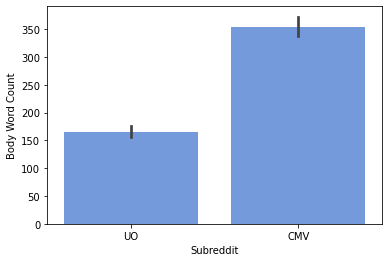

In [63]:
sns.barplot(x= 'subreddit', y = 'body_word_count', data = df, color = 'cornflowerblue')
# plt.title('Body Word Count by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Body Word Count')
plt.xticks(ticks = [0,1], labels = ['UO','CMV'])
plt.show;

In [64]:
df.groupby("subreddit")["body_character_length"].mean()

subreddit
0    933.291405 
1    2135.131410
Name: body_character_length, dtype: float64

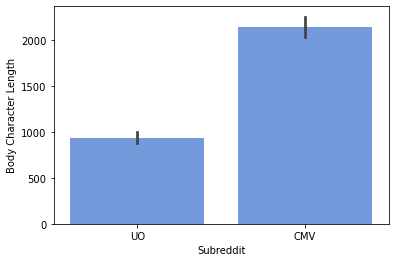

In [65]:
sns.barplot(x= 'subreddit', y = 'body_character_length', data = df, color = 'cornflowerblue')
# plt.title('Body Word Count by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Body Character Length')
plt.xticks(ticks = [0,1], labels = ['UO','CMV'])
plt.show;

In [66]:
df.groupby("subreddit")["title_character_length"].mean()

subreddit
0    86.507338 
1    106.682692
Name: title_character_length, dtype: float64

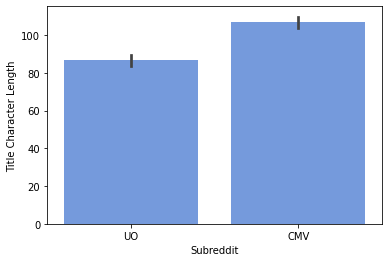

In [67]:
sns.barplot(x= 'subreddit', y = 'title_character_length', data = df, color = 'cornflowerblue')
# plt.title('Body Word Count by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Title Character Length')
plt.xticks(ticks = [0,1], labels = ['UO','CMV'])
plt.show;

In [68]:
df.groupby("subreddit")["body_upper_case"].mean() # look at ratio of upper case to lower case letters

subreddit
0    21.025157
1    42.912393
Name: body_upper_case, dtype: float64

In [69]:
df.groupby("subreddit")["title_upper_case"].mean() # look at ratio of upper case to lower case letters

subreddit
0    1.976939
1    5.386752
Name: title_upper_case, dtype: float64

In [70]:
#  ratio of exclamation marks to number of words for title and body
df['body_exclamation_ratio'] = df['body_exclamation_marks']/ df['body_word_count']
df['title_exclamation_ratio'] = df['title_exclamation_marks']/ df['title_word_count']

In [71]:
# ratio of upper case to total characters in title and body
df['body_upper_case_ratio'] = df['body_upper_case'] / df['body_character_length']
df['title_upper_case_ratio'] = df['title_upper_case'] / df['title_character_length']

In [72]:
df.groupby("subreddit")["body_exclamation_ratio"].mean() 

subreddit
0    0.003143
1    0.002174
Name: body_exclamation_ratio, dtype: float64

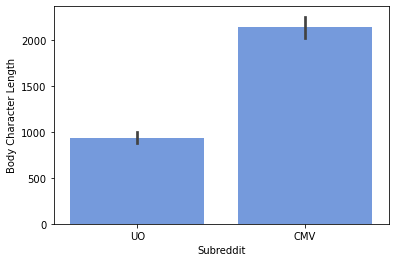

In [73]:
sns.barplot(x= 'subreddit', y = 'body_character_length', data = df, color = 'cornflowerblue')
# plt.title('Body Word Count by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Body Character Length')
plt.xticks(ticks = [0,1], labels = ['UO','CMV'])
plt.show;

In [74]:
df.groupby("subreddit")["title_exclamation_ratio"].mean() 

subreddit
0    0.000254
1    0.000750
Name: title_exclamation_ratio, dtype: float64

In [75]:
df.groupby("subreddit")["body_upper_case_ratio"].mean() 

subreddit
0    0.022688
1    0.020066
Name: body_upper_case_ratio, dtype: float64

In [76]:
df.groupby("subreddit")["title_upper_case_ratio"].mean()

subreddit
0    0.027487
1    0.060015
Name: title_upper_case_ratio, dtype: float64

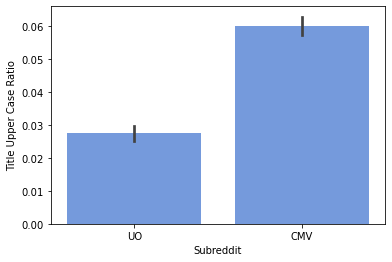

In [77]:
sns.barplot(x= 'subreddit', y = 'title_upper_case_ratio', data = df, color = 'cornflowerblue')
# plt.title('Body Word Count by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Title Upper Case Ratio')
plt.xticks(ticks = [0,1], labels = ['UO','CMV'])
plt.show;

In [78]:
df.describe()

,score,comms_num,subreddit,body_exclamation_marks,title_exclamation_marks,body_word_count,title_word_count,body_character_length,title_character_length,body_upper_case,title_upper_case,body_lower_case,title_lower_case,body_exclamation_ratio,title_exclamation_ratio,body_upper_case_ratio,title_upper_case_ratio
count,1890.000000,1890.000000,1890.000000,1890.00000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000
mean,16405.633862,1478.504762,0.495238,0.62381,0.004762,259.184656,16.602116,1528.488360,96.498942,31.864550,3.665608,1166.255556,74.434392,0.002663,0.000500,0.021389,0.043596
std,15494.911296,1481.519807,0.500110,1.42122,0.076161,245.086513,7.939314,1530.158132,46.520569,37.605115,2.988301,1160.737966,36.993685,0.007491,0.010200,0.022711,0.043658
min,1501.000000,58.000000,0.000000,0.00000,0.000000,1.000000,2.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2849.250000,453.000000,0.000000,0.00000,0.000000,110.000000,11.000000,619.250000,64.000000,10.000000,1.000000,468.250000,48.000000,0.000000,0.000000,0.013795,0.016949
50%,14725.500000,1016.000000,0.000000,0.00000,0.000000,186.500000,15.000000,1082.500000,89.000000,20.000000,4.000000,829.000000,69.000000,0.000000,0.000000,0.018500,0.033333
75%,25385.750000,1959.000000,1.000000,1.00000,0.000000,325.750000,21.000000,1933.000000,122.000000,40.000000,5.000000,1477.500000,95.000000,0.002408,0.000000,0.024376,0.054545
max,112753.000000,12393.000000,1.000000,18.00000,2.000000,3091.000000,54.000000,20356.000000,298.000000,587.000000,48.000000,14585.000000,242.000000,0.118110,0.333333,0.735135,0.714286


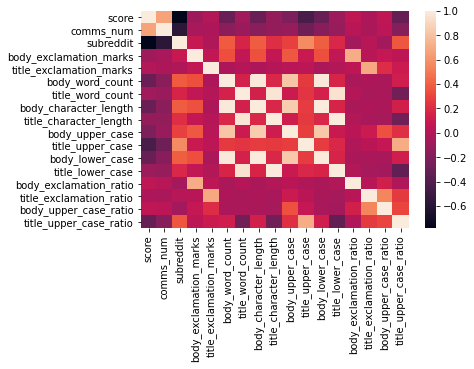

In [79]:
sns.heatmap(df.corr());

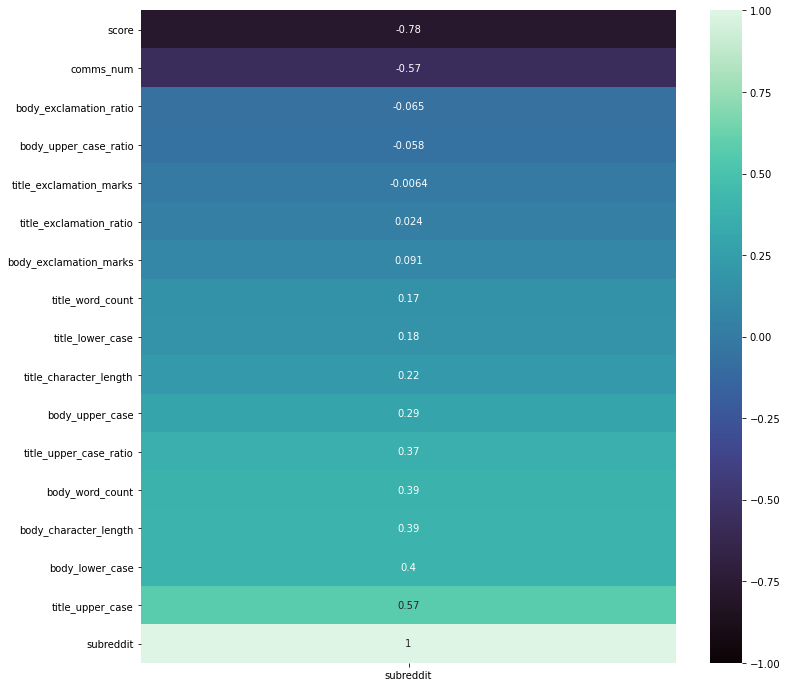

In [80]:
fig = plt.gcf()
fig.set_size_inches(12, 12)

sns.heatmap(df.corr()[['subreddit']].sort_values('subreddit'),
            annot=True,
            vmin = -1, 
            vmax = 1,
            cmap= 'mako');

In [81]:
df.groupby("subreddit")["score"].mean()

subreddit
0    28411.280922
1    4169.108974 
Name: score, dtype: float64

In [82]:
df.groupby("subreddit")["comms_num"].mean()

subreddit
0    2315.171908
1    625.747863 
Name: comms_num, dtype: float64

In summary, longer posts (those with higher character counts and word counts), with lower scores and lower number of comments are more highly correlated with the changemyview subreddit. For reference, unpopularopinion has 1.7 million members, while changemyview has 1.2 million members. Unpopular opinion is 14th on the list of Today's Top Growing Communities (as of 10/18/2020) and changemyview is 44th. 

I think it is reasonable to use character and word counts in my model, as it is possible that the length of posts differentiates subreddits in which users engage in open-minded discussion from those in which they do not. I will not include post score and number of comments in my model, since these appear to reflect the popularity of/level of user engagement with a particular subreddit, and may not reflect how polarized or open-minded the discussions in a  subreddit are.   

In [83]:
# Features to remove: score, comms_num, body_exclamation_ratio, body_upper_case_ratio, title_exclamation_marks,
#title_exclamation_ratio, body_exclamation_marks, title_word_count, title_lower_case, body_upper_case, body_lower_case, 
#title_upper_case
df.drop(columns = {'score', 'comms_num', 'body_exclamation_ratio',
                   'body_upper_case_ratio', 'title_exclamation_marks',
                   'title_exclamation_ratio', 'body_exclamation_marks', 
                   'title_word_count', 'title_lower_case', 'body_upper_case', 
                   'body_lower_case', 'title_upper_case', 'created'}, inplace = True)


In [84]:
df.shape

(1890, 7)

In [85]:
# commented out so that I don't accidentally run the cell and replace the original data
#df.to_csv('../data/modeling_df.csv', index = False)